<a href="https://colab.research.google.com/github/bidishaaiml/COE_week7/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House price prediction**

In [621]:
#importing the necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import sklearn

# **Loading and Inspecting the dataset**

In [622]:
#loading the dataset
df=pd.read_csv("/content/train (2).csv")
test=pd.read_csv("/content/test.csv")

In [623]:
#Displaying the first 5 rows of the datset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [624]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [625]:
# Displaying concise summary information about the DataFrame using df.info()
# This includes the column data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [626]:
# Generating descriptive statistics of the DataFrame using df.describe()
# This includes count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **Data Visualization**

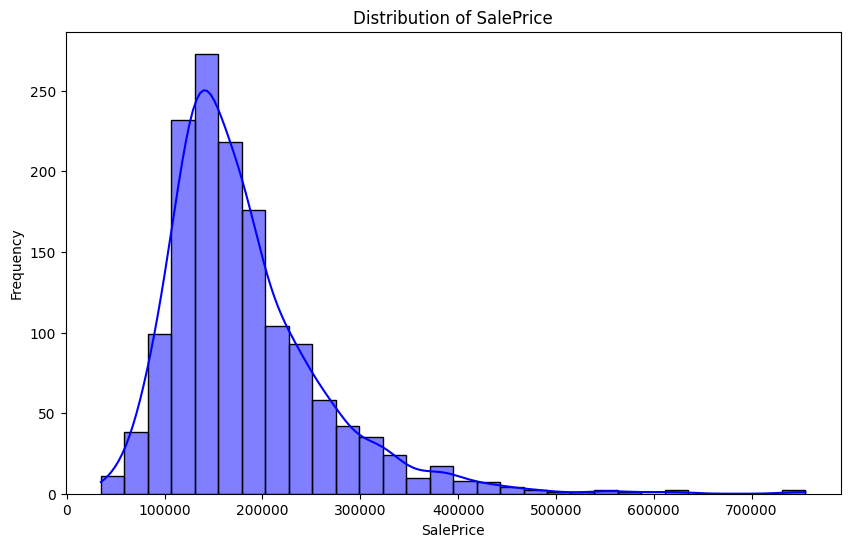

In [627]:
# Distribution plot of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

Inference from Sale Price Distribution:
The distribution of SalePrice is right-skewed, indicating that most houses are priced below the mean, with a few houses having very high prices.

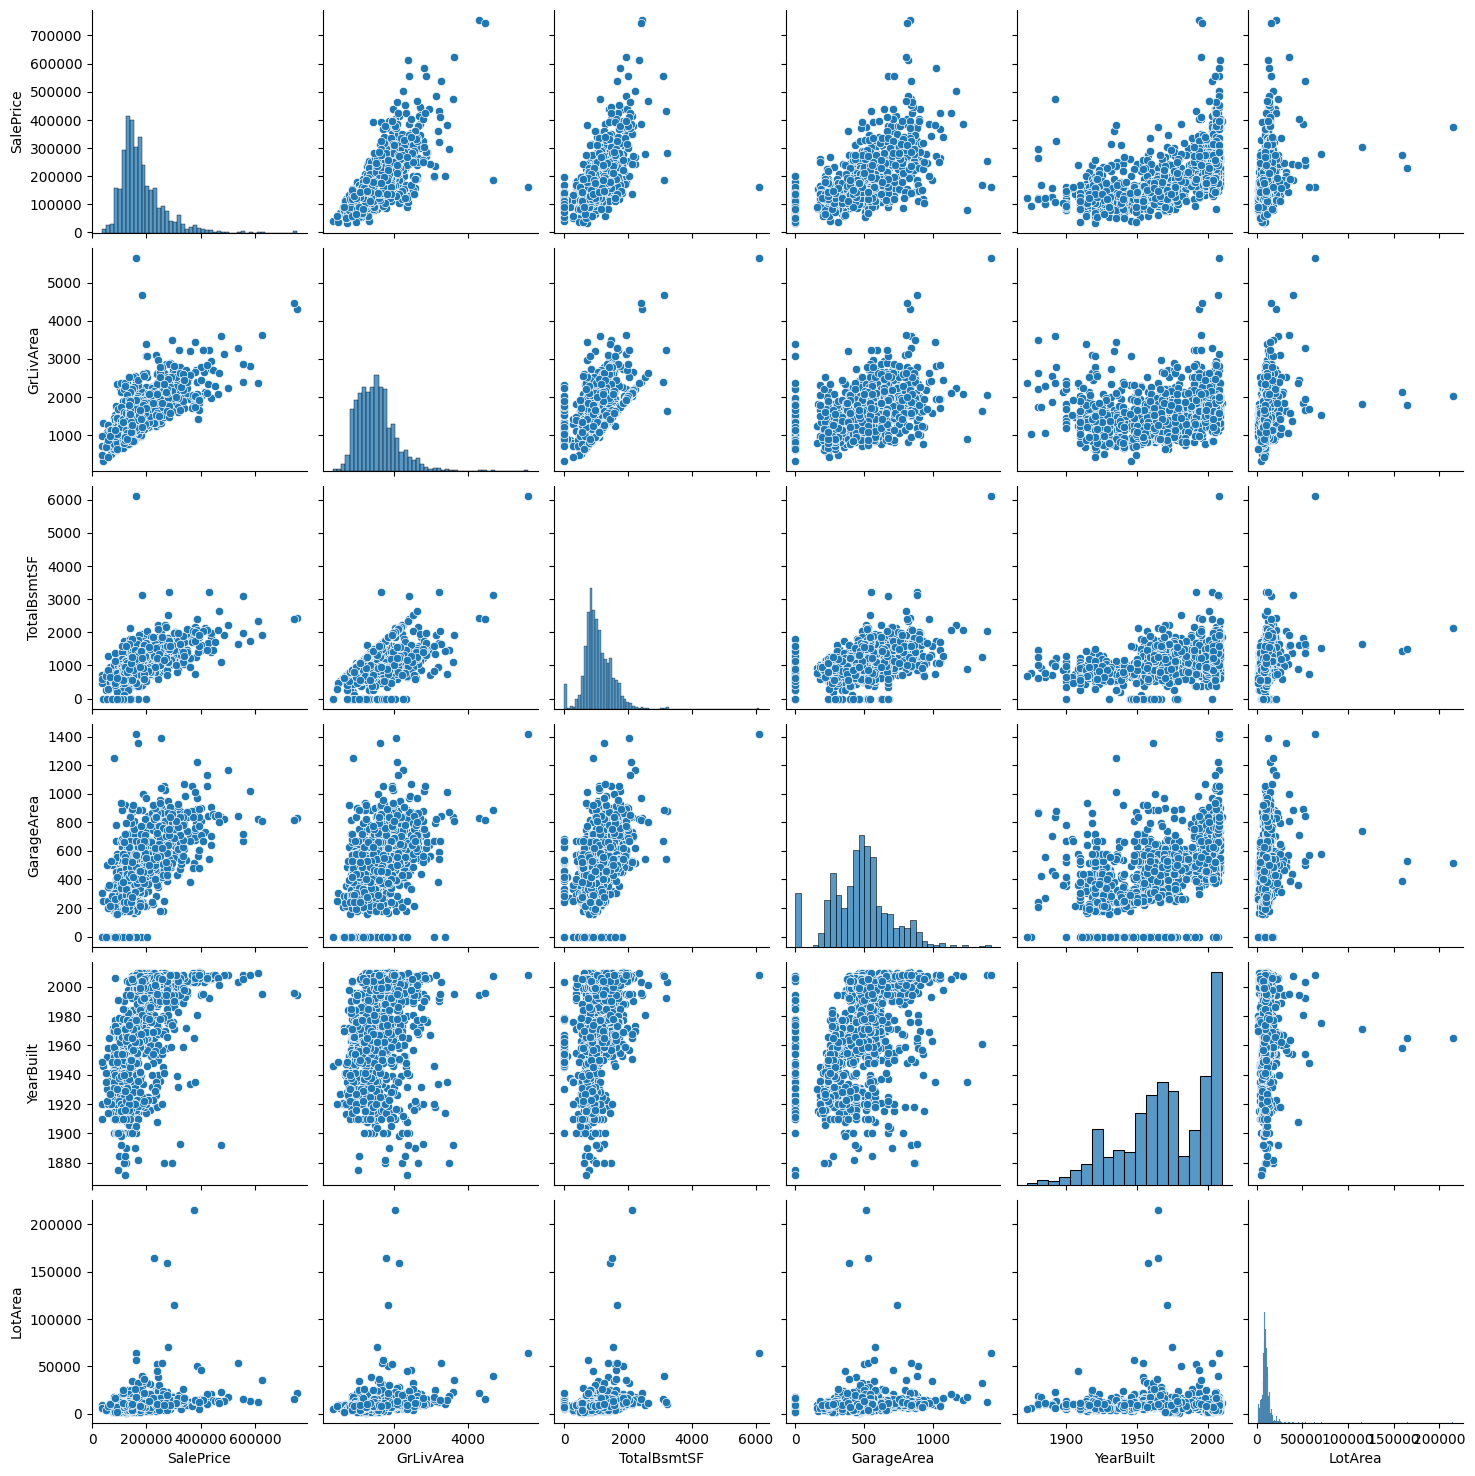

In [628]:
# Pairplot for selected numerical features
sns.pairplot(df[['SalePrice', 'GrLivArea', 'TotalBsmtSF','GarageArea','YearBuilt','LotArea']])
plt.show()


In [629]:
# Calculating correlation matrix
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [630]:
# Extracting the correlation values between 'SalePrice' and all other features
# Sorting the correlation values in descending order
# This helps in identifying which features have the strongest positive or negative correlation with 'SalePrice'
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_with_saleprice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

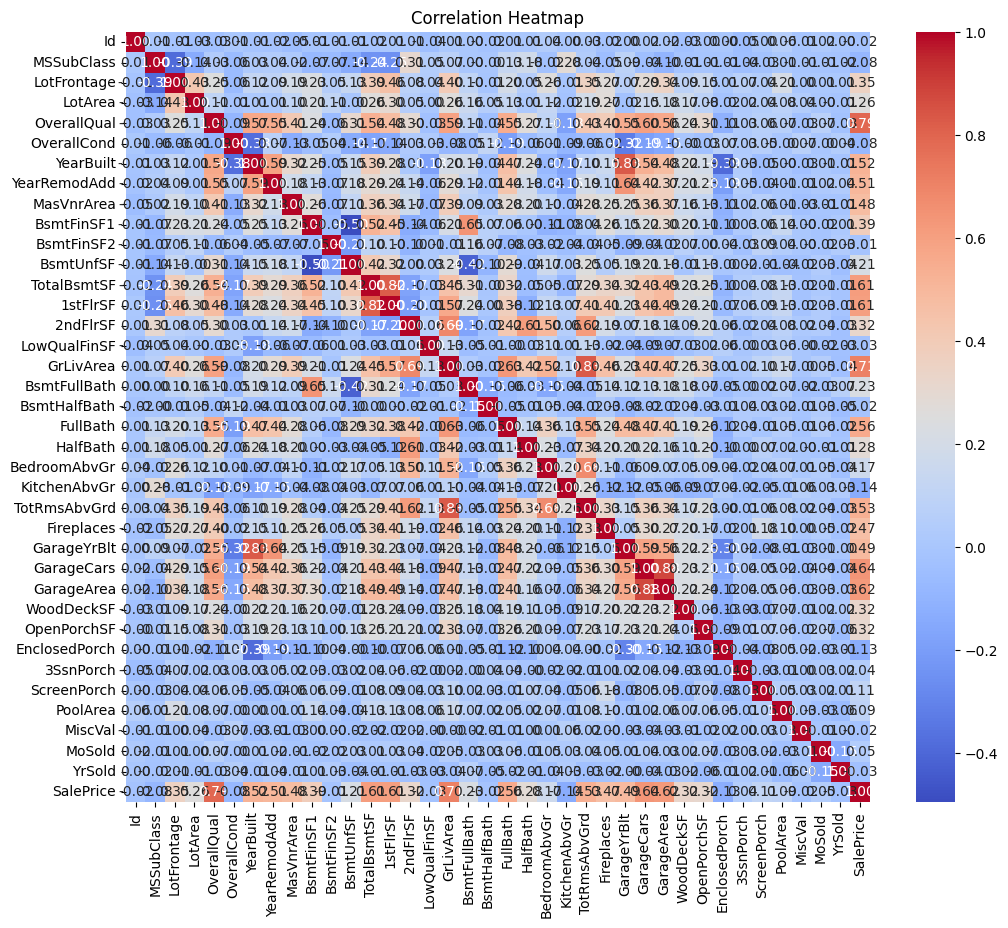

In [631]:
# Ploting heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing and feature Engineering**

## **Handling Missing Values**

In [632]:
# Setting Pandas display option to show all rows, then calculating and displaying the number of null values (missing values) in each column of the DataFrame df.
pd.set_option('display.max_rows', None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

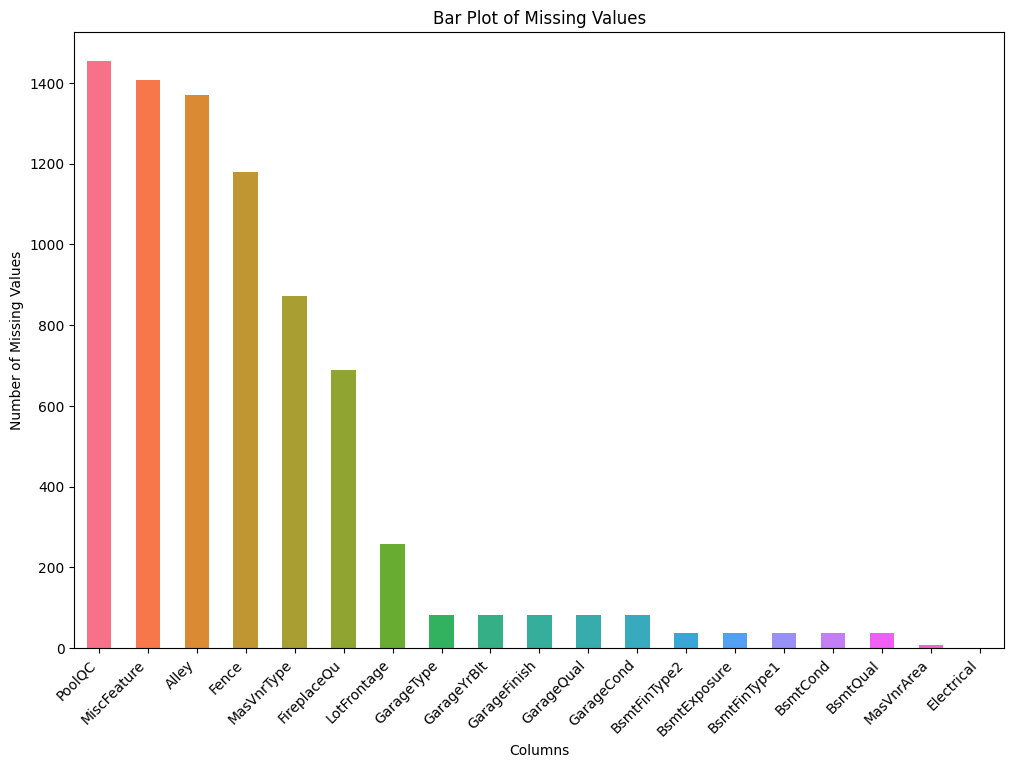

In [633]:
# Visualizing missing values using a bar plot
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Creating a bar plot with a colorful colormap
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(missing_values))
missing_values.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Bar Plot of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [634]:
#loading the descriptive text file that contains the description about each column
from pathlib import Path

# Specifing the path to your text file
file_path = Path('/content/data_description.txt')

# Opening and reading the file
file_contents = file_path.read_text()

# Printing the contents of the file
print(file_contents)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## **Handling the Null Values**

In [635]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [636]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [637]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [638]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [639]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [640]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [641]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

### **Droping columns with significant missing values.**

In [642]:
df.drop(['Alley'],axis=1,inplace=True)
test.drop(['Alley'],axis=1,inplace=True)


In [643]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)
test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [644]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [645]:
df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [646]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [647]:
# Remove all rows with missing values from the DataFrame
df.dropna(inplace=True)

### Inference: All missing or null values have been addressed.

# **Feature Engineering**

### Creating new features from the exsting features

In [648]:
# Creating new features

# Age of the house
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

# Years since last remodel
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']
test['YearsSinceRemodel'] = test['YrSold'] - test['YearRemodAdd']

# Total number of bathrooms (considering half baths as 0.5), When creating a feature for the total number of bathrooms, half baths are usually considered as 0.5 because they don't provide the full functionality of a full bath.
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
test['TotalBath'] = test['FullBath'] + 0.5 * test['HalfBath'] + test['BsmtFullBath'] + 0.5 * test['BsmtHalfBath']

# Total porch area
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
test['TotalPorchSF'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

# Total finished basement area
df['TotalBsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
test['TotalBsmtFinSF'] = test['BsmtFinSF1'] + test['BsmtFinSF2']

# Total floor area
df['TotalFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']
test['TotalFlrSF'] = test['1stFlrSF'] + test['2ndFlrSF']

# Overall quality-condition index
df['OverallQC'] = df['OverallQual'] + df['OverallCond']
test['OverallQC'] = test['OverallQual'] + test['OverallCond']

# Is the house newly built
df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)
test['IsNew'] = (test['YearBuilt'] == test['YrSold']).astype(int)

# Does the house have a pool
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
test['HasPool'] = (test['PoolArea'] > 0).astype(int)

# Does the house have a garage
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
test['HasGarage'] = (test['GarageArea'] > 0).astype(int)

# Does the house have a basement
df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)
test['HasBasement'] = (test['TotalBsmtSF'] > 0).astype(int)


# Does the house have a fireplace
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
test['HasFireplace'] = (test['Fireplaces'] > 0).astype(int)

# Does the house have a second floor
df['Has2ndFlr'] = (df['2ndFlrSF'] > 0).astype(int)
test['Has2ndFlr'] = (test['2ndFlrSF'] > 0).astype(int)

# Total outdoor space area
df['TotalOutdoorSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
test['TotalOutdoorSF'] = test['WoodDeckSF'] + test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

# Dropping columns that might not be necessary
columns_to_drop = [
    'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath',
    'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF',
    '2ndFlrSF', 'OverallQual', 'OverallCond', 'PoolArea', 'GarageArea',
    'Fireplaces', 'WoodDeckSF'
]

df.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

# Displaying the first few rows of the updated DataFrame to verify changes
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,TotalBsmtFinSF,TotalFlrSF,OverallQC,IsNew,HasPool,HasGarage,HasBasement,HasFireplace,Has2ndFlr,TotalOutdoorSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,706,1710,12,0,0,1,1,0,1,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,978,1262,14,0,0,1,1,1,0,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,486,1786,12,0,0,1,1,1,1,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,216,1717,12,0,0,1,1,1,1,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,655,2198,13,0,0,1,1,1,1,276


New Features:

HouseAge: The age of the house when sold.

YearsSinceRemodel: Years since the house was last remodeled.

TotalBath: Total number of bathrooms, combining full and half bathrooms from both above and below grade.

TotalPorchSF: Total area of all porches.

TotalBsmtFinSF: Total finished basement area.

TotalFlrSF: Total area of the first and second floors.

OverallQC: A combined index of overall quality and condition.

IsNew: Binary indicator if the house was sold the same year it was built.

HasPool: Binary indicator if the house has a pool.

HasGarage: Binary indicator if the house has a garage.

HasBasement: Binary indicator if the house has a basement.

HasFireplace: Binary indicator if the house has a fireplace.

Has2ndFlr: Binary indicator if the house has a second floor.

TotalOutdoorSF: Total area of outdoor spaces like decks and porches.

In [649]:
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_with_saleprice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# **Checking For Duplicate values**

In [650]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
else:
    print("No duplicate rows found in the dataset.")



No duplicate rows found in the dataset.


## **Seperating numerical and categorical columns**

In [651]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# **Outlier Handling**

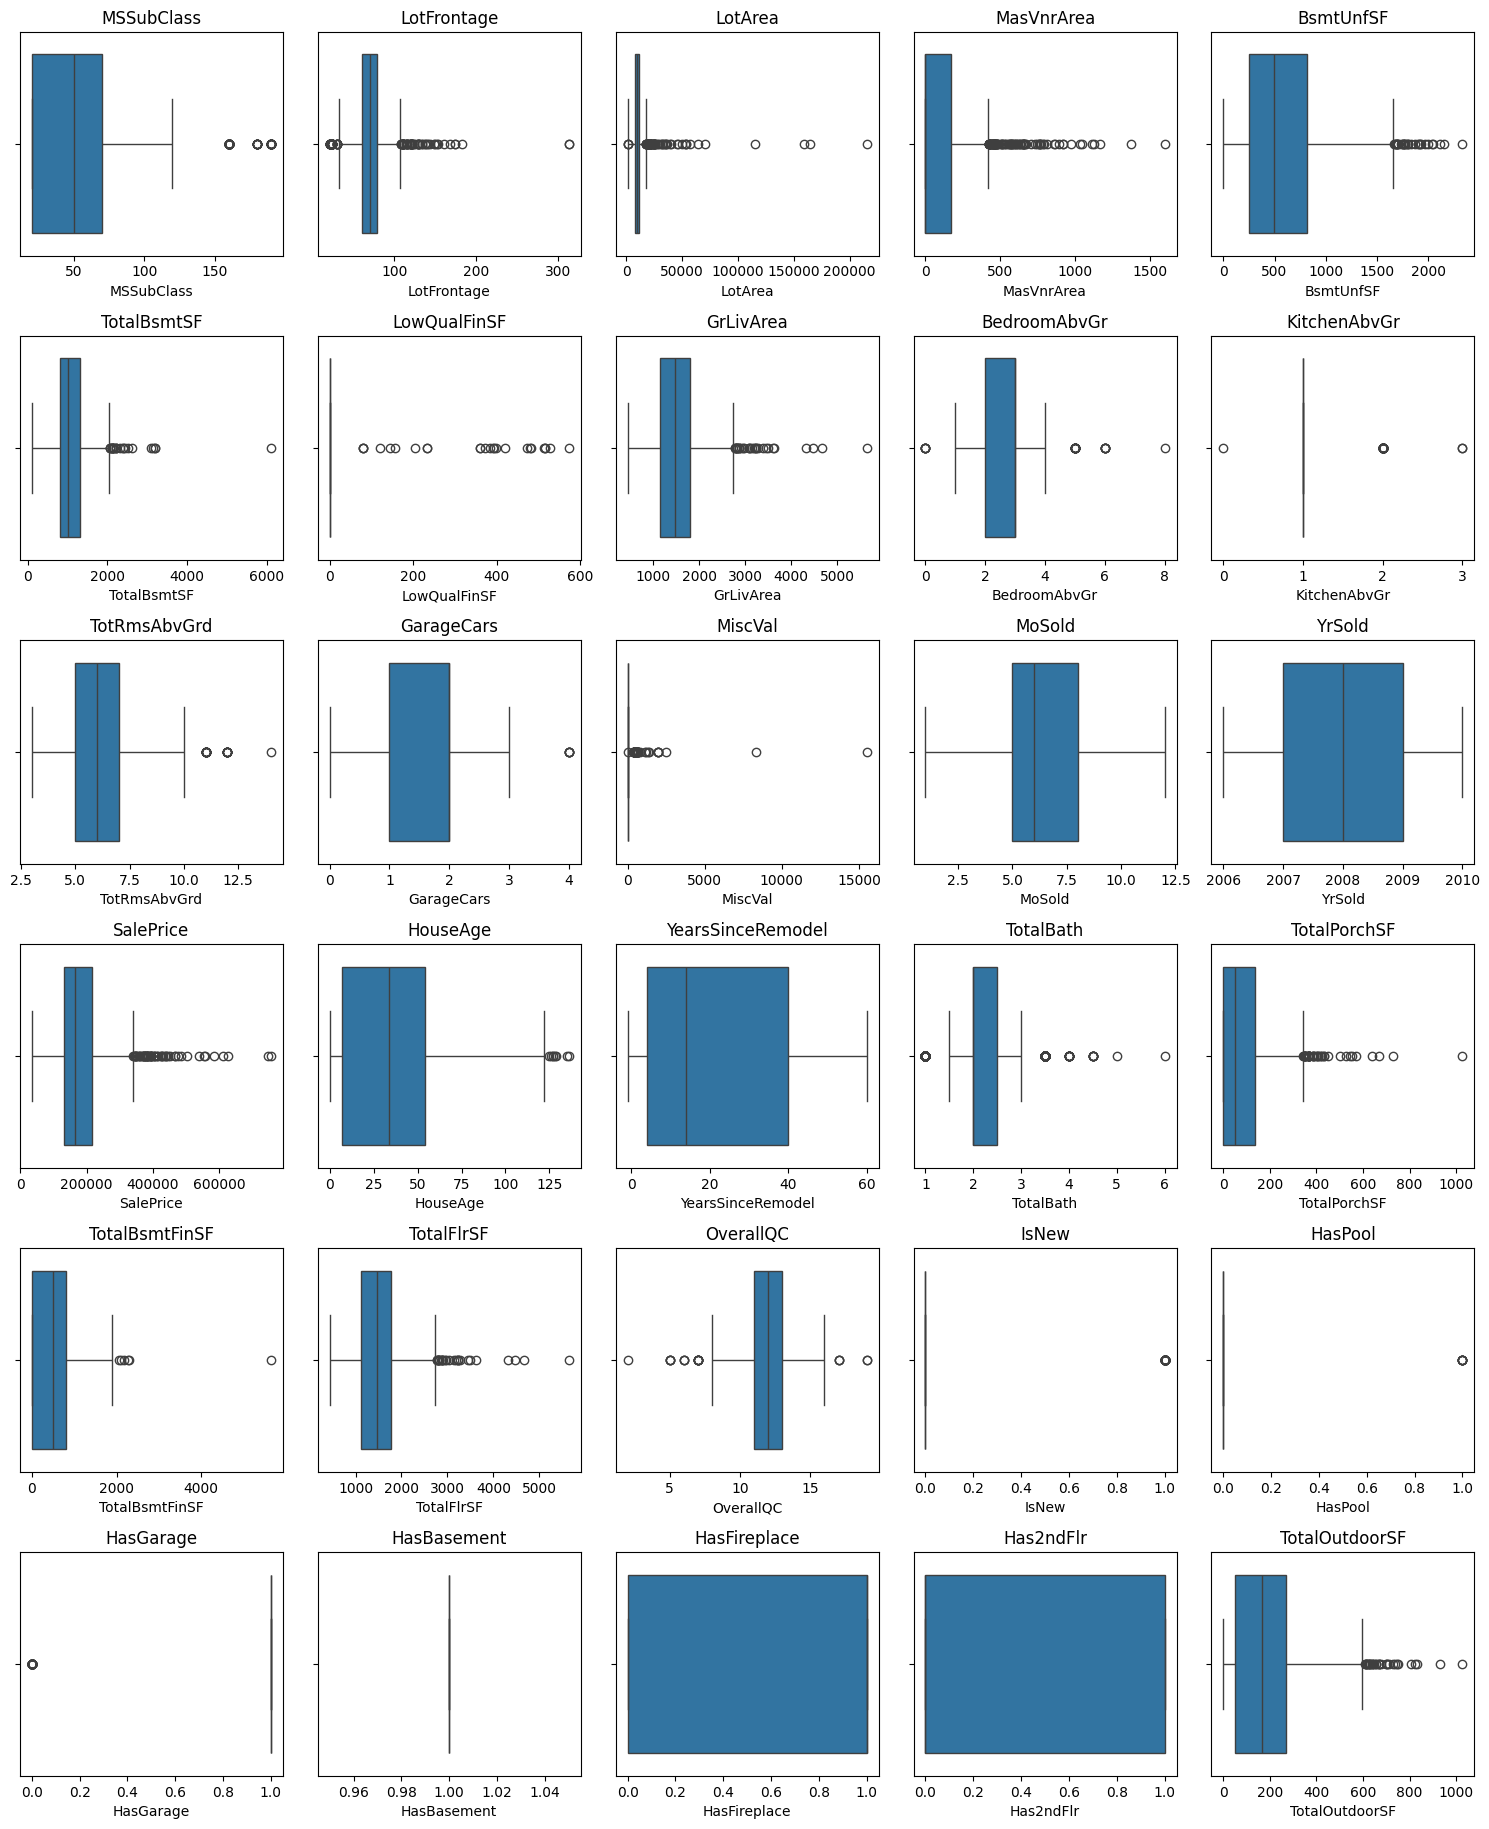

In [652]:
num_cols = len(numerical_cols)
num_rows = (num_cols // 5) + 1

# Setting up the matplotlib figure
plt.figure(figsize=(15, 3 * num_rows))

# Iterate over each numerical column and create a box plot
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(num_rows, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [653]:
# a generalised function to find the threshold values
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [654]:
# checking for outlier columns
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True #returns True if atleast 1 point in the column is an outlier
    else:
        return False #returns False if no point in the column is an outlier

In [655]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

MSSubClass True
LotFrontage True
LotArea True
MasVnrArea True
BsmtUnfSF True
TotalBsmtSF True
LowQualFinSF True
GrLivArea True
BedroomAbvGr True
KitchenAbvGr True
TotRmsAbvGrd True
GarageCars True
MiscVal True
MoSold False
YrSold False
SalePrice True
HouseAge True
YearsSinceRemodel False
TotalBath True
TotalPorchSF True
TotalBsmtFinSF True
TotalFlrSF True
OverallQC True
IsNew True
HasPool True
HasGarage True
HasBasement False
HasFireplace False
Has2ndFlr False
TotalOutdoorSF True


In [656]:
# function to replace the outliers with the treshold values
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [657]:
# Now replace these outliers with thresholds.
for col in numerical_cols:
    replace_with_thresholds(df, col)

In [658]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

MSSubClass False
LotFrontage False
LotArea False
MasVnrArea False
BsmtUnfSF False
TotalBsmtSF False
LowQualFinSF False
GrLivArea False
BedroomAbvGr False
KitchenAbvGr False
TotRmsAbvGrd False
GarageCars False
MiscVal False
MoSold False
YrSold False
SalePrice False
HouseAge False
YearsSinceRemodel False
TotalBath False
TotalPorchSF False
TotalBsmtFinSF False
TotalFlrSF False
OverallQC False
IsNew False
HasPool False
HasGarage False
HasBasement False
HasFireplace False
Has2ndFlr False
TotalOutdoorSF False


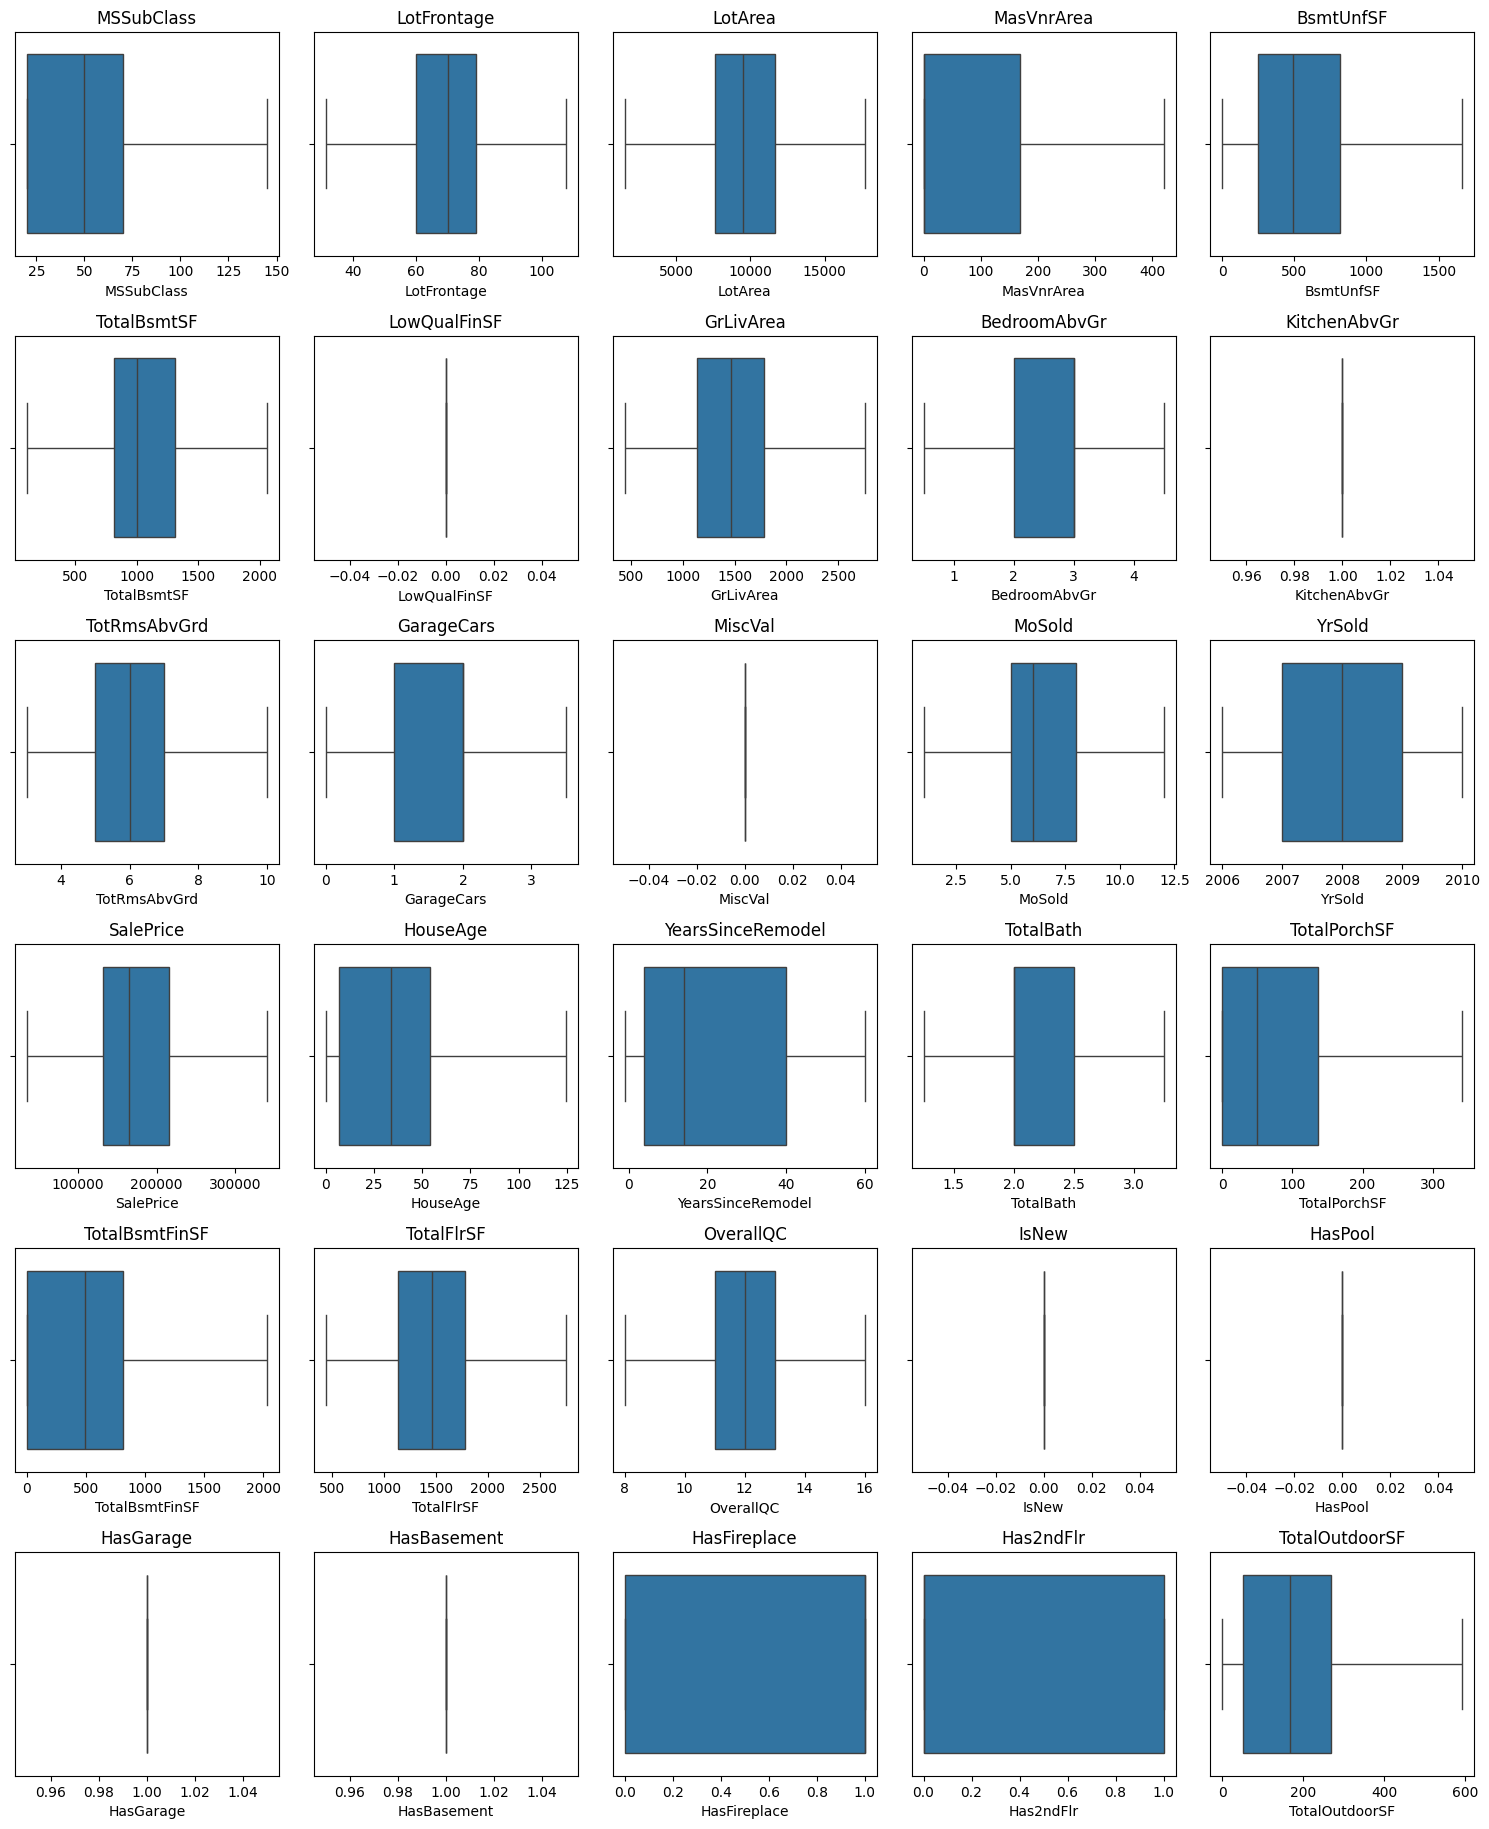

In [659]:
num_cols = len(numerical_cols)
num_rows = (num_cols // 5) + 1

# Setting up the matplotlib figure
plt.figure(figsize=(15, 3 * num_rows))

# Iterate over each numerical column and create a box plot
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(num_rows, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [660]:
check_outlier(df,'SalePrice')

False

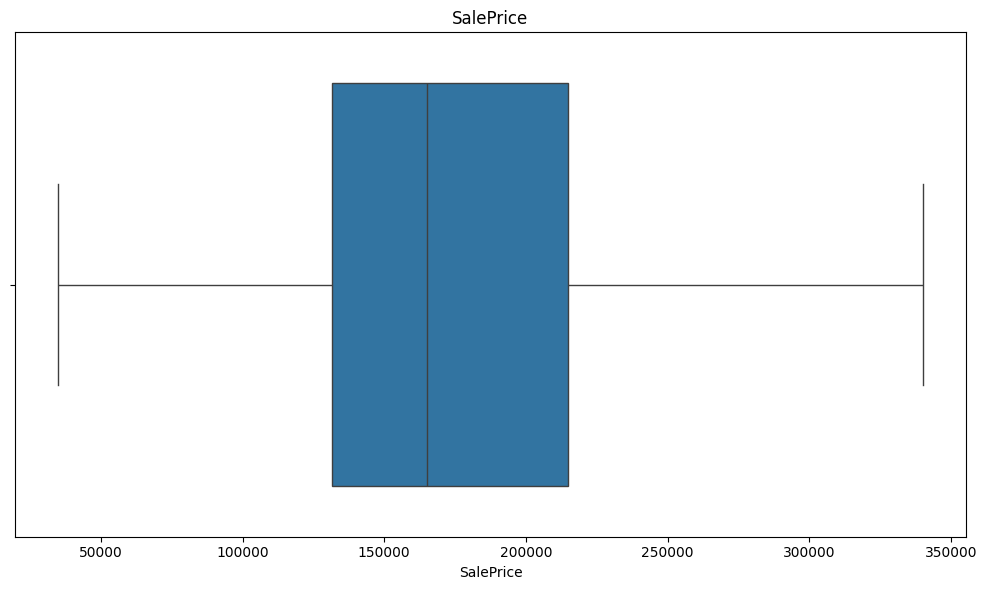

In [661]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('SalePrice')
plt.tight_layout()

plt.show()

### Inference: Outliers have been addressed and removed.

# **Handling the categorical values using OneHotEncoder**

In [662]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit-transform the categorical columns and create a DataFrame
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate numerical columns with encoded categorical columns
df_encoded = pd.concat([df[numerical_cols], encoded_df], axis=1)

# Displaying the encoded DataFrame
df_encoded.head()
df=df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [663]:
df.dropna(inplace=True)

In [664]:
df.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,196.0,150.0,856.0,0.0,1710.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,0.0,284.0,1262.0,0.0,1262.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,162.0,434.0,920.0,0.0,1786.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,0.0,540.0,756.0,0.0,1717.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,350.0,490.0,1145.0,0.0,2198.0,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# **Performing a train-test split and fitting a linear regression model**

     Actual      Predicted
0  136500.0  146683.030972
1  120000.0  143401.353508
2  183500.0  208872.481108
3  212000.0  207352.755067
4  340062.5  307581.484877


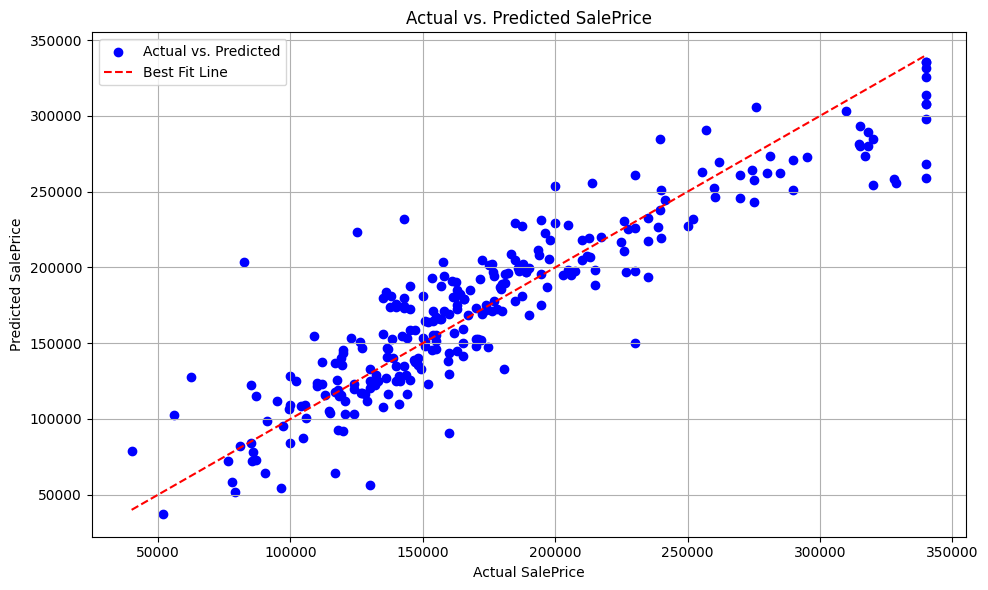

In [665]:
from sklearn.model_selection import train_test_split # Importing the necessary function

from sklearn.linear_model import LinearRegression # Importing LinearRegression


# Separating features and target variable from training data
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Spliting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model on the training subset
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the validation set
y_val_pred = model.predict(X_val)

# Converting y_val and y_val_pred to Series
y_test_series = pd.Series(y_val.values, name='Actual')
y_pred_series = pd.Series(y_val_pred, name='Predicted')

# Creating results DataFrame
results = pd.concat([y_test_series, y_pred_series], axis=1)


print(results.head())



# Plotting the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], linestyle='--', color='red', label='Best Fit Line')
plt.title('Actual vs. Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Evaluation Metrics**

Mean Squared Error (MSE): 720821073.4656676
Root Mean Squared Error (RMSE): 26848.1111712848
R-squared (R²): 0.8306939186179123


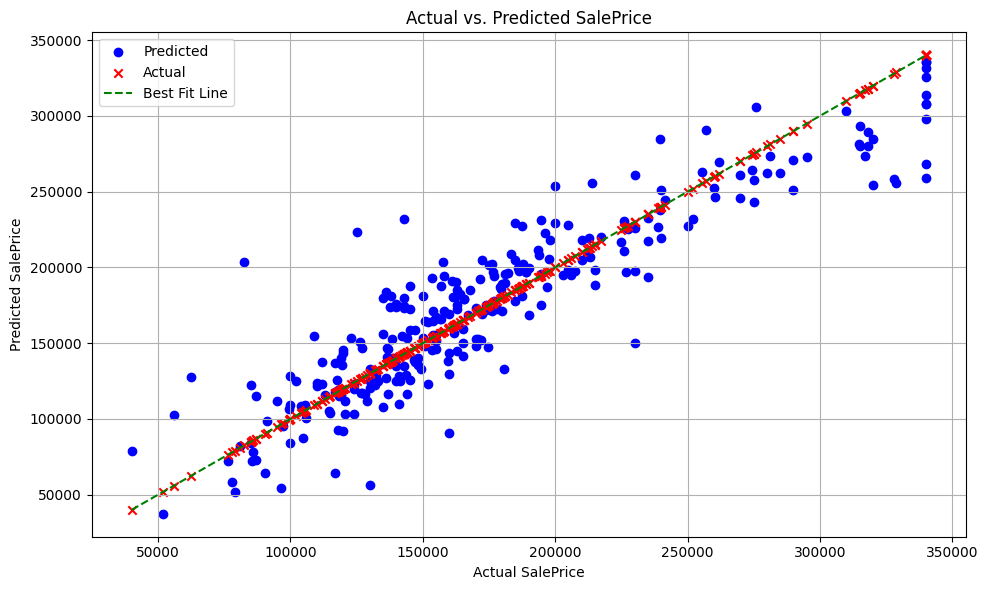

In [666]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating MSE
mse = mean_squared_error(y_val, y_val_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_val, y_val_pred)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plotting the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, color='blue', marker='o', label='Predicted')
plt.scatter(y_val, y_val, color='red', marker='x', label='Actual')

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], linestyle='--', color='green', label='Best Fit Line')

plt.title('Actual vs. Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [667]:
min_saleprice = df['SalePrice'].min()
max_saleprice = df['SalePrice'].max()
mean_saleprice = df['SalePrice'].mean()
median_saleprice = df['SalePrice'].median()

print(f"Minimum SalePrice: {min_saleprice}")
print(f"Maximum SalePrice: {max_saleprice}")
print(f"Mean SalePrice: {mean_saleprice}")
print(f"Median SalePrice: {median_saleprice}")

Minimum SalePrice: 34900.0
Maximum SalePrice: 340062.5
Mean SalePrice: 179356.83453757226
Median SalePrice: 165000.0


# **Using GridSearchCV to discover optimal hyperparameters**

In [668]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Defining the hyperparameters and their values to search over
param_grid = {
    'fit_intercept': [True, False],
}

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'fit_intercept': True}


# **Applying PCA and StandardScaler, and then fitting the model again**

In [669]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Applying PCA
pca = PCA(n_components=0.95)  # Choosing variance to retain
X_pca = pca.fit_transform(X_scaled)

# Fitting linear regression on the transformed data
regression_model = LinearRegression()
regression_model.fit(X_pca, y_train)

# transforming test set using the same pipeline
X_val_scaled = scaler.transform(X_val)
X_val_pca = pca.transform(X_val_scaled)

# Predict using the regression model on the transformed test data
y_pred = regression_model.predict(X_val_pca)

# Calculating MSE,RMSE and R2 score
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 700997356.0284308
Root Mean Squared Error (RMSE): 26476.354658986398
R-squared (R²): 0.8353501031292607


### **Data Preprocessing on the Test dataset**

In [670]:
# seperating the numerical and categorical columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns
test_categorical_cols = test.select_dtypes(include=['object']).columns

In [671]:
# Imputing missing values for numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
test[test_numerical_cols] = num_imputer.fit_transform(test[test_numerical_cols])

# Imputing missing values for categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
test[test_categorical_cols] = cat_imputer.fit_transform(test[test_categorical_cols])

In [672]:
test.isnull().sum()

MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Street               0
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinType2         0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
LowQualFinSF         0
GrLivArea            0
BedroomAbvGr         0
KitchenAbvGr         0
KitchenQual          0
TotRmsAbvGrd         0
Functional           0
FireplaceQu          0
GarageType 

In [673]:
# Separate numerical and categorical columns
target_column = 'SalePrice'
target=df[target_column]
df=df.drop(target_column,axis=1)


In [674]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit-transform the categorical columns and create a DataFrame
encoded_cols = encoder.fit_transform(test[test_categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(test_categorical_cols))

# Concatenating numerical columns with encoded categorical columns
test_encoded = pd.concat([test[test_numerical_cols], encoded_df], axis=1)


test_encoded.head()
test=test_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [675]:

from sklearn.preprocessing import StandardScaler
X_train = df
X_test = test

# Geting numerical columns for both training and testing sets
numerical_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns

# Finding common numerical columns
common_numerical_cols = numerical_cols_train.intersection(numerical_cols_test)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the common numerical columns of the training data
scaler.fit(X_train[common_numerical_cols])

# Scaling training data using common columns
train_scaled = scaler.transform(X_train[common_numerical_cols])
train_scaled_df = pd.DataFrame(train_scaled, columns=common_numerical_cols)

# Scaling test data using common columns
test_scaled = scaler.transform(X_test[common_numerical_cols])
test_scaled_df = pd.DataFrame(test_scaled, columns=common_numerical_cols)

# Concatenating scaled numerical columns with non-numerical columns for both sets
train_scaled_df = pd.concat([train_scaled_df, X_train.drop(columns=common_numerical_cols).reset_index(drop=True)], axis=1)
test_scaled_df = pd.concat([test_scaled_df, X_test.drop(columns=common_numerical_cols).reset_index(drop=True)], axis=1)

# Displaying the scaled training and test data
train_scaled_df = train_scaled_df[X_train.columns]
test_scaled_df = test_scaled_df[X_test.columns]


print("Scaled Training Data:")
train_scaled_df.head()
print("\nScaled Test Data:")
test_scaled_df.head()

Scaled Training Data:

Scaled Test Data:


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.935447,0.610910,0.547102,-0.671051,-0.725210,-0.532930,0.0,-1.278456,-1.137716,0.0,...,-0.060215,-0.060215,-0.305298,-0.046608,0.394029,-0.046608,-0.076249,-0.12109,0.470676,-0.309522
1,-0.935447,0.668165,1.280487,0.123349,-0.406095,0.678685,0.0,-0.379113,0.189939,0.0,...,-0.060215,-0.060215,-0.305298,-0.046608,0.394029,-0.046608,-0.076249,-0.12109,0.470676,-0.309522
2,0.131763,0.267379,1.159319,-0.671051,-1.037285,-0.408245,0.0,0.243988,0.189939,0.0,...,-0.060215,-0.060215,-0.305298,-0.046608,0.394029,-0.046608,-0.076249,-0.12109,0.470676,-0.309522
3,0.131763,0.496399,0.091266,-0.523940,-0.598503,-0.413666,0.0,0.192063,0.189939,0.0,...,-0.060215,-0.060215,-0.305298,-0.046608,0.394029,-0.046608,-0.076249,-0.12109,0.470676,-0.309522
4,1.732577,-1.507532,-1.287609,-0.671051,1.027574,0.545868,0.0,-0.480886,-1.137716,0.0,...,-0.060215,-0.060215,-0.305298,-0.046608,0.394029,-0.046608,-0.076249,-0.12109,0.470676,-0.309522


In [676]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Extracting common columns between train and test datasets
common_columns = train_scaled_df.columns.intersection(test_scaled_df.columns)

# Filtering the training and test datasets to only include these common columns
X_train_common = train_scaled_df[common_columns]
X_test_common = test_scaled_df[common_columns]

# Fitting the linear regression model on the training data
model = LinearRegression()
model.fit(X_train_common, target)

# Making predictions on the test data
y_pred = model.predict(X_test_common)

# Assuming y_test_series contains the actual sale prices
min_actual = y_test_series.min()
max_actual = y_test_series.max()

# Scaling the predicted values to the range of actual sale prices
y_pred_scaled = np.interp(y_pred, (y_pred.min(), y_pred.max()), (min_actual, max_actual))

# Creating a DataFrame to compare actual and scaled predicted values
y_pred_scaled_series = pd.Series(y_pred_scaled, name="Predicted SalePrice")
results_scaled = pd.concat([y_test_series, y_pred_scaled_series], axis=1)


y_pred_series = pd.Series(y_pred, name="Predicted SalePrice")
y_pred_series.head()
# Creating results DataFrame
results = pd.concat([y_test_series, y_pred_series], axis=1)


print(results_scaled.head())

     Actual  Predicted SalePrice
0  136500.0        116682.314505
1  120000.0        280932.450898
2  183500.0        116682.314505
3  212000.0        116682.314505
4  340062.5        116682.314505


In [677]:
df.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,196.0,150.0,856.0,0.0,1710.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,0.0,284.0,1262.0,0.0,1262.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,162.0,434.0,920.0,0.0,1786.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,0.0,540.0,756.0,0.0,1717.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,350.0,490.0,1145.0,0.0,2198.0,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [678]:
test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,0.0,270.0,882.0,0.0,896.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,108.0,406.0,1329.0,0.0,1329.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,0.0,137.0,928.0,0.0,1629.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,20.0,324.0,926.0,0.0,1604.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,0.0,1017.0,1280.0,0.0,1280.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
